In [2]:
#librerias
# BUENA TRABAJO
#5.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit


In [3]:
#Leamos los datos de el archivo "fit_curve.csv"
df=pd.read_csv("fit_curve.csv",sep=",",index_col=False)
df

Unnamed: 0  x    y
0           0  0  0.0
1           1  1  1.3
2           2  2  2.6
3           3  3  3.9
4           4  4  5.2
5           5  5  6.5
6           6  6  5.8
7           7  7  5.1
8           8  8  4.4
9           9  9  3.7

In [4]:
#Renombremos
x_data=df["x"]
y_data=df["y"]

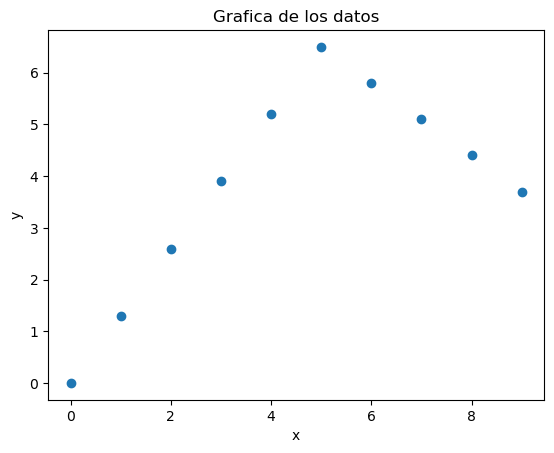

In [5]:
#Grafica de los datos de "fit_curve.csv"
plt.plot(x_data,y_data,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafica de los datos")
plt.show()


#### a) Proponer una curva en el cual se puedan ajustar los datos y calcular el error asociado

1. Realizemos el ajuste mediante minimize

In [6]:
#Consideremos la siguiente función de ajuste: una parabola
def parabola(x,param):
    return param[0]*x**2+param[1]*x+param[2]

#Chi2
def chi2_parabola(param):
    return np.sum(np.square(y_data-parabola(x_data,param)))

In [7]:
#Ajustamos por minimize, donde obtenemos los parametros de ajuste
result_parabola=minimize(chi2_parabola,(1,1,1))
result_parabola

      fun: 1.6666666666841665
 hess_inv: array([[ 0.00094697, -0.0085227 ,  0.0113636 ],
       [-0.0085227 ,  0.08276568, -0.12954639],
       [ 0.0113636 , -0.12954639,  0.30909254]])
      jac: array([3.72529030e-07, 5.96046448e-08, 1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([-0.18939412,  2.15606222, -0.45454755])

In [8]:
#Parametros para ajustar los datos
print("Parametros de ajuste por minimize",result_parabola.x)
#chi2
print("Chi2: {}".format(chi2_parabola(result_parabola.x)))

Parametros de ajuste por minimize [-0.18939412  2.15606222 -0.45454755]
Chi2: 1.6666666666841665


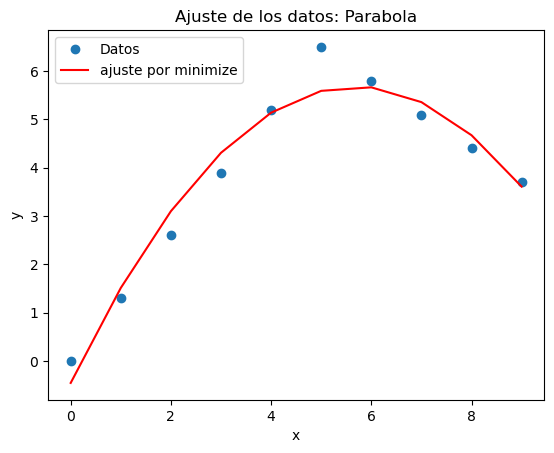

In [9]:
#Grafica del ajuste vs los datos
plt.plot(x_data,y_data,"o",label="Datos")
plt.plot(x_data,parabola(x_data,result_parabola.x),color="red",label="ajuste por minimize")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de los datos: Parabola")
plt.legend()

2. Realizemos el ajuste con Curve_fit

In [11]:
#Definamos la función para haer el curve_fit
def fun_parabola2(x,a,b,c):
    return  a*x**2+b*x+c

In [12]:
#Curve_fit
datos_ajuste,datos_cov=curve_fit(fun_parabola2,x_data,y_data,p0=[1,1,1])
errores_datos=np.sqrt(np.diagonal(datos_cov))
print("datos_ajuste con curve_fit {}".format(datos_ajuste))
print("Errores asociados a cada uno de los parametros de ajuste",errores_datos)


datos_ajuste con curve_fit [-0.18939394  2.15606061 -0.45454545]
Errores asociados a cada uno de los parametros de ajuste [0.0212353  0.19852451 0.38364847]


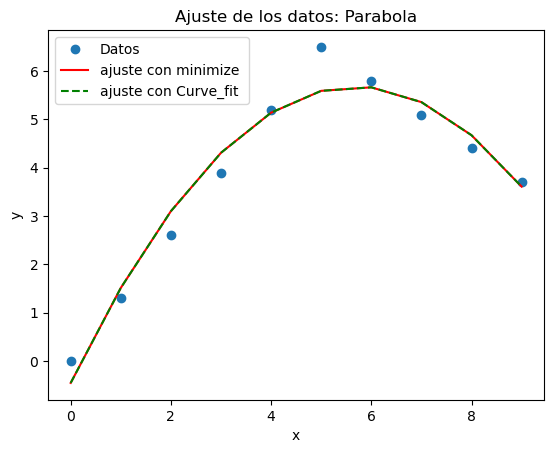

In [13]:
#Grafica del ajuste vs los datos
plt.plot(x_data,y_data,"o",label="Datos")
plt.plot(x_data,parabola(x_data,result_parabola.x),color="red",label="ajuste con minimize ")
plt.plot(x_data,fun_parabola2(x_data,datos_ajuste[0],datos_ajuste[1],datos_ajuste[2]),"--",color="green",label="ajuste con Curve_fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de los datos: Parabola")
plt.legend()

Vemos que se obtiene los mismos parametros y el mismo ajuste por los dos metodos(minimize y curve_fit)

#### b) Considerar la función de ajuste *def gauss* y calcular los mejores parámetros para ajustar los datos y calcular el $\chi ^2$ para este ajuste.


In [14]:
#Consideremos la siguiente función de ajuste
def gauss(x,param):
    return param[0]*np.exp(-(x-param[1])**2/(2*param[2]**2))

#Chi2
def chi2_gauss(param):
    return np.sum(np.square(y_data-gauss(x_data,param)))

In [15]:
#Ajustamos por minimize, donde obtenemos los parametros de ajuste
result_gauss=minimize(chi2_gauss,(1,1,1))
result_gauss

      fun: 1.581760277650854
 hess_inv: array([[ 0.15768057, -0.01849532, -0.06137304],
       [-0.01849532,  0.05385695,  0.02192419],
       [-0.06137304,  0.02192419,  0.0662364 ]])
      jac: array([-3.39746475e-06, -5.57303429e-06, -8.94069672e-07])
  message: 'Optimization terminated successfully.'
     nfev: 104
      nit: 17
     njev: 26
   status: 0
  success: True
        x: array([6.19486272, 5.74654892, 2.78281483])

In [16]:
#Parametros para ajustar los datos
print("Parametros de ajuste",result_gauss.x)
#Chi2
print("Chi2: {}".format(chi2_gauss(result_gauss.x)))

Parametros de ajuste [6.19486272 5.74654892 2.78281483]
Chi2: 1.581760277650854


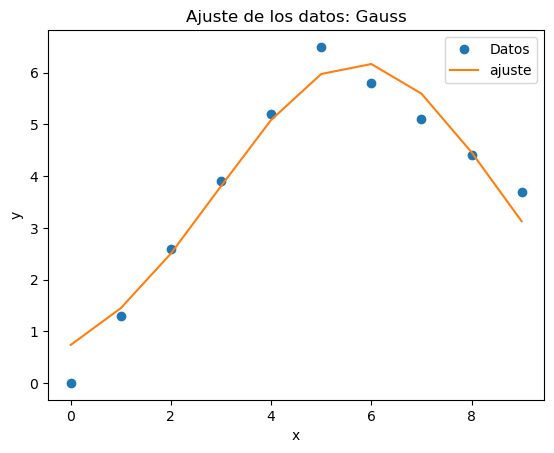

In [17]:
#Grafica del ajuste vs los datos
plt.plot(x_data,y_data,"o",label="Datos")
plt.plot(x_data,gauss(x_data,result_gauss.x),label="ajuste")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de los datos: Gauss")
plt.legend()


#### c)Para este item consideremos una función más general

$$f(x)= x+ b+ gauss(x, norm,mean,sigma)$$

#### y calcular los mejores parámetros para ajustar los datos y calcular el $\chi ^2$ para este ajuste.

In [19]:
#Consideremos la siguiente función de ajuste
def f(x,param):
    return x + param[0] + (param[1]*np.exp(-(x-param[2])**2/(2*param[3]**2)))

#Chi2
def chi2_f(param):
    return np.sum(np.square(y_data-f(x_data,param)))

In [20]:
#Ajustamos por minimize, donde obtenemos los parametros de ajuste
result_f=minimize(chi2_f,(1,1,1,1))
result_f

      fun: 1.6704126054613604
 hess_inv: array([[ 5.28941234e+05, -5.28943677e+05, -6.31279978e+01,
        -1.80585661e+04],
       [-5.28943677e+05,  5.28946193e+05,  6.31386147e+01,
         1.80581873e+04],
       [-6.31279971e+01,  6.31386141e+01,  1.01207296e-01,
         1.43713881e+00],
       [-1.80585661e+04,  1.80581873e+04,  1.43713887e+00,
         6.25443347e+02]])
      jac: array([ 7.92011619e-04,  7.93308020e-04,  6.11543655e-05, -7.66664743e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 98
     njev: 136
   status: 2
  success: False
        x: array([-538.22433478,  539.53784255,    3.05247003,   37.62781454])

In [21]:
#Parametros para ajustar los datos
print("Parametros de ajuste",result_f.x)
#Chi2
print("Chi2: {}".format(chi2_f(result_f.x)))

Parametros de ajuste [-538.22433478  539.53784255    3.05247003   37.62781454]
Chi2: 1.6704126054613604


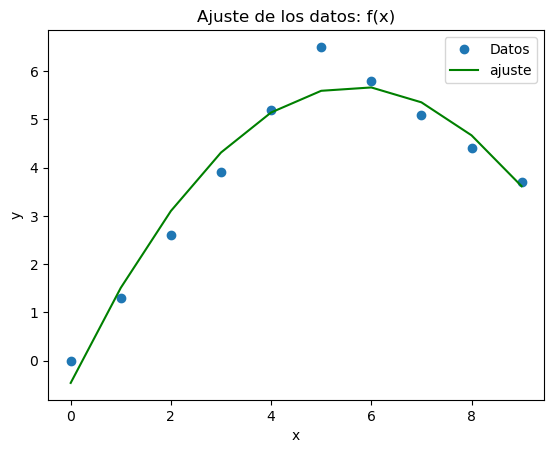

In [22]:
#Grafica del ajuste vs los datos
plt.plot(x_data,y_data,"o",label="Datos")
plt.plot(x_data,f(x_data,result_f.x),color="green",label="ajuste")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de los datos: f(x)")
plt.legend()
